# Notebook clean df2


https://data.world/wikimedia/monthly-wikimedia-editor-activity  

Download : 12/12/2023

In [ ]:
%reload_ext autoreload
%autoreload 2
from P3_helpers import *

## Import Datasets

In [ ]:
df = pd.read_csv('prep_df_v2.csv')
df.head()

,wiki,month,user_name,revisions,year
0,aawiki,2004-04,Angela,2.0,2004
1,aawiki,2004-06,Tim Starling,10.0,2004
2,aawiki,2004-08,Tim Starling,2.0,2004
3,aawiki,2004-09,Davidcannon,2.0,2004
4,aawiki,2004-12,Tim Starling,12.0,2004


In [ ]:
df2 = get_dataframe()
df2.head()

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."


In [ ]:
df_timeserie = get_timeserie_df(df2)
df_timeserie.head()

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.000000,1
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.850000,6
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.,1,0.500000,2
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,0.966667,3
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,1.716667,4


## Target

In [ ]:
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M')

### Average revision's number 12 month before and after the last election

In [ ]:
process_df = process_elections(df2)

In [ ]:
df_target_rev = generate_user_revision_dataset(df, process_df)

In [ ]:
result_stats = revision_stat(df_target_rev)

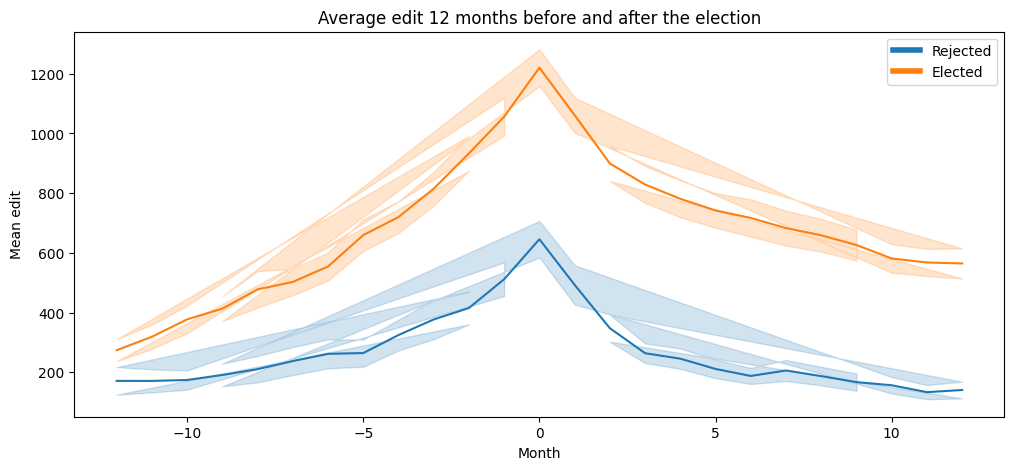

In [ ]:
ax = plot_average_edit(result_stats, 'Month', mean_col='mean')
ax.set_title('Average edit 12 months before and after the election')
plt.show()

### Average revision's number 12 month before and after all the different election

In [ ]:
process_df_ts = process_elections_ts(df_timeserie)

In [ ]:
df_target_rev_ts = generate_user_revision_dataset(df, process_df_ts)

In [ ]:
result_stats_ts = revision_stat(df_target_rev_ts)

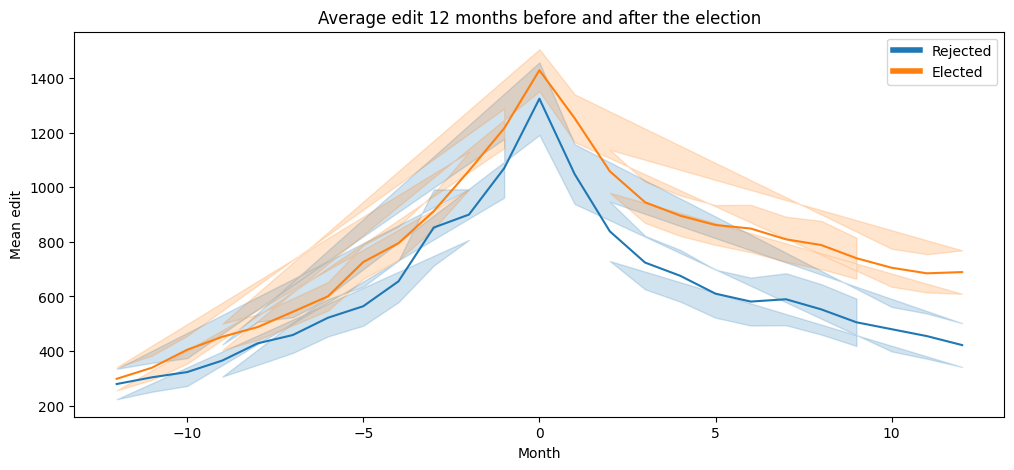

In [ ]:
ax2 = plot_average_edit(result_stats_ts, 'Month', mean_col='mean')
ax2.set_title('Average edit 12 months before and after the election')
plt.show()

### Causal Analysis between the different election of a given user

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
causal_process = process_df_ts.drop_duplicates(subset=['Target','Round'])

In [ ]:
causal_process.head()

,Target,Round,First_Vote_Date,Result,Year_Month
0,(aeropagitica),1,2006-02-28 00:09:00,1.0,2006-02
1,07bargem,1,2010-09-29 19:42:00,-1.0,2010-09
2,1234r00t,1,2010-05-20 00:06:00,-1.0,2010-05
3,21655,1,2008-03-17 22:08:00,-1.0,2008-03
4,21655,2,2008-03-19 19:48:00,-1.0,2008-03


In [ ]:
test = create_df_causal(causal_process, df)
test.head()

,Target,revisions,Result
0,(aeropagitica),1473.0,1.0
1,07bargem,7.0,-1.0
2,1234r00t,0.0,-1.0
3,21655,1833.0,-1.0
4,21655,1833.0,-1.0


In [ ]:
# 1 mois
print(smf.ols('revisions ~ Result', data=test).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              revisions   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     151.0
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.47e-34
Time:                        07:24:36   Log-Likelihood:                -40240.
No. Observations:                4728   AIC:                         8.048e+04
Df Residuals:                    4726   BIC:                         8.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    791.9960     17.580     45.051      0.0

In [ ]:
# 1 mois
print(smf.ols('Result ~ revisions', data=test).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     151.0
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.47e-34
Time:                        07:23:53   Log-Likelihood:                -6610.5
No. Observations:                4728   AIC:                         1.323e+04
Df Residuals:                    4726   BIC:                         1.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2107      0.017    -12.507      0.0

In [ ]:
# 2 mois
print(smf.ols('Result ~ revisions', data=test).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     186.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.25e-41
Time:                        07:09:09   Log-Likelihood:                -6593.5
No. Observations:                4728   AIC:                         1.319e+04
Df Residuals:                    4726   BIC:                         1.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2280      0.017    -13.408      0.0

In [ ]:
# 6 mois

model = smf.ols('Result ~ revisions', data=test).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     207.1
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           5.53e-46
Time:                        06:57:29   Log-Likelihood:                -6583.5
No. Observations:                4728   AIC:                         1.317e+04
Df Residuals:                    4726   BIC:                         1.318e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2313      0.017    -13.734      0.0

## Community

In [ ]:
df_2010 =  pd.read_csv('df_community_2010.csv')
df_2010.head()

,Source,Community
0,Bubba hotep-source,2
1,Shadowjams-source,1
2,Sonia-source,2
3,Graeme Bartlett-source,2
4,Ceranthor-source,1


In [ ]:
df_dict = load_datasets_com(df)

### Distribution of revisions by community

In [ ]:
agg_data_dict = compute_stats_community(df_dict)


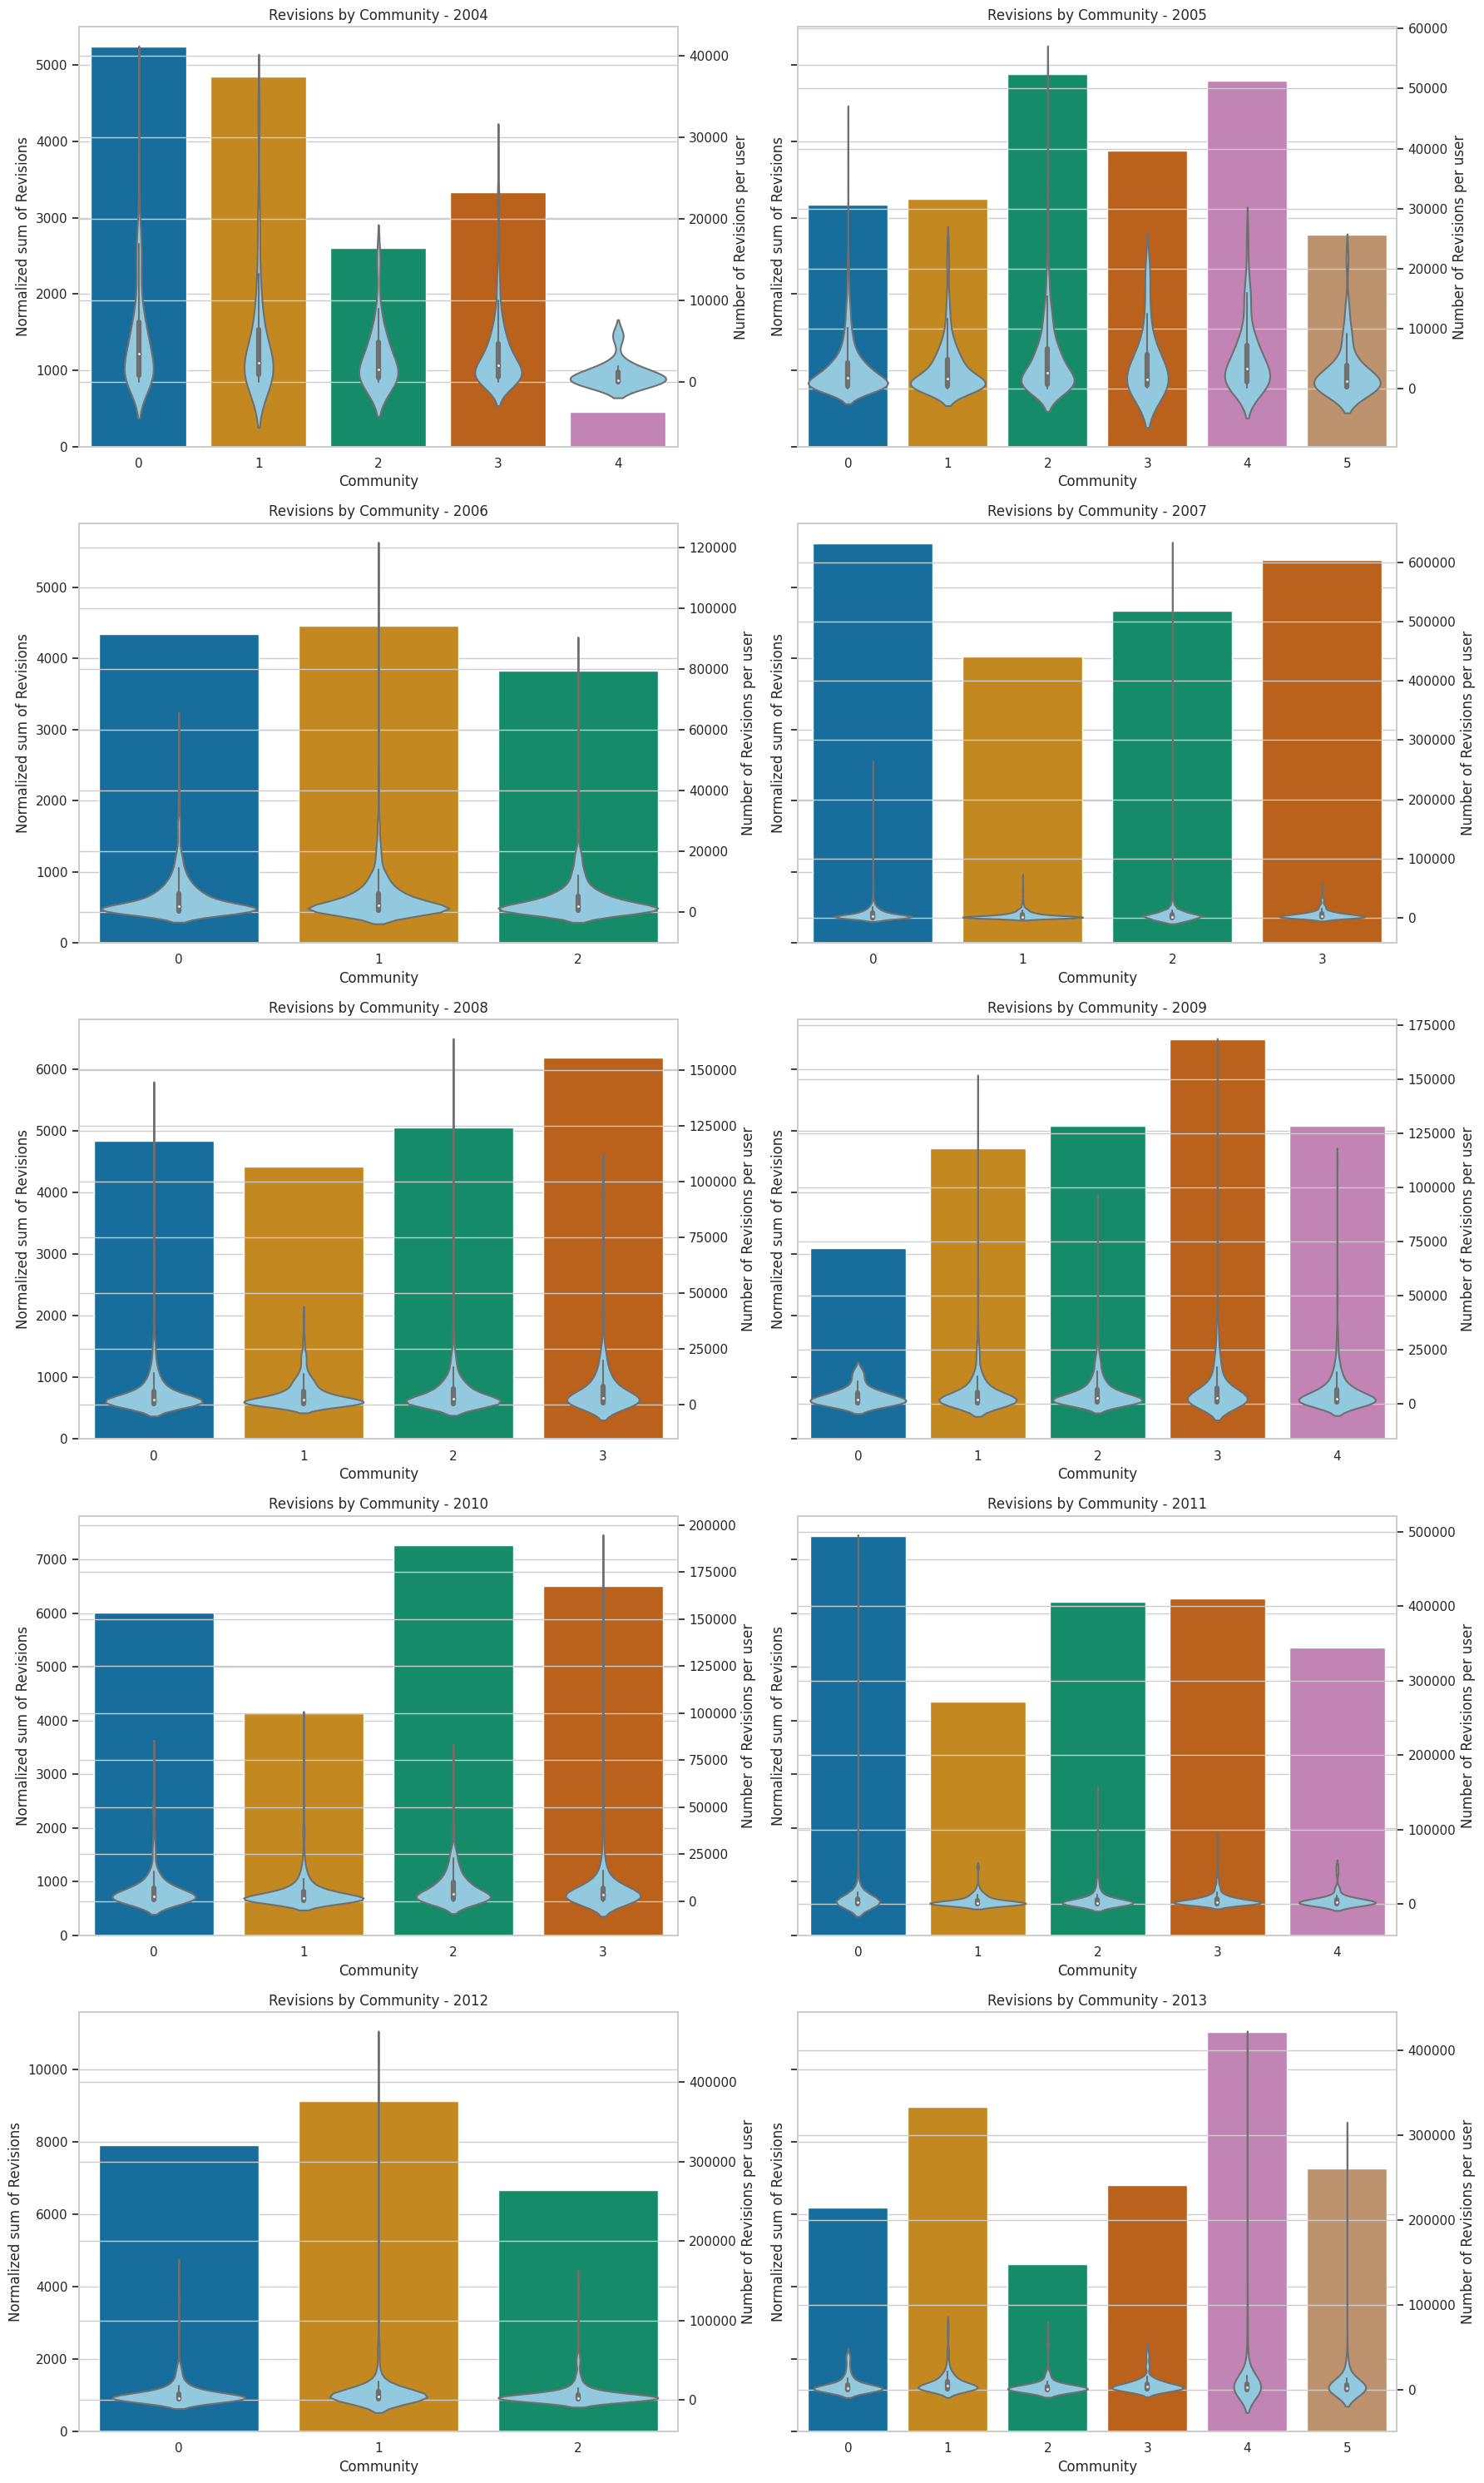

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a 3x5 grid of subplots (adjust the layout based on your preference)
fig, axes = plt.subplots(5, 2, figsize=(18, 30), sharey='row')

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Iterate over the DataFrame dictionary and plot on each subplot
for i, (year, df) in enumerate(agg_data_dict.items()):
    # Boxplot for the sum of revisions
    sns.barplot(x='Community', y='sum_normalized', data=df, palette='colorblind', ax=axes[i])
    axes[i].set_title(f'Revisions by Community - {year}')
    axes[i].set_xlabel('Community')
    axes[i].set_ylabel('Normalized sum of Revisions')

    # Violin plot for the mean number of revisions
    ax_violin = axes[i].twinx()  # Create a second y-axis for the violin plot
    sns.violinplot(x='Community', y='revisions', data=df_dict[year], ax=ax_violin, color='skyblue')
    ax_violin.set_ylabel('Number of Revisions per user')

# Adjust layout
plt.tight_layout()
plt.show()

### Distribution of revisions of the top 10 active source of each community

In [ ]:
top_users_dict = compute_top_k(df_dict, 10)

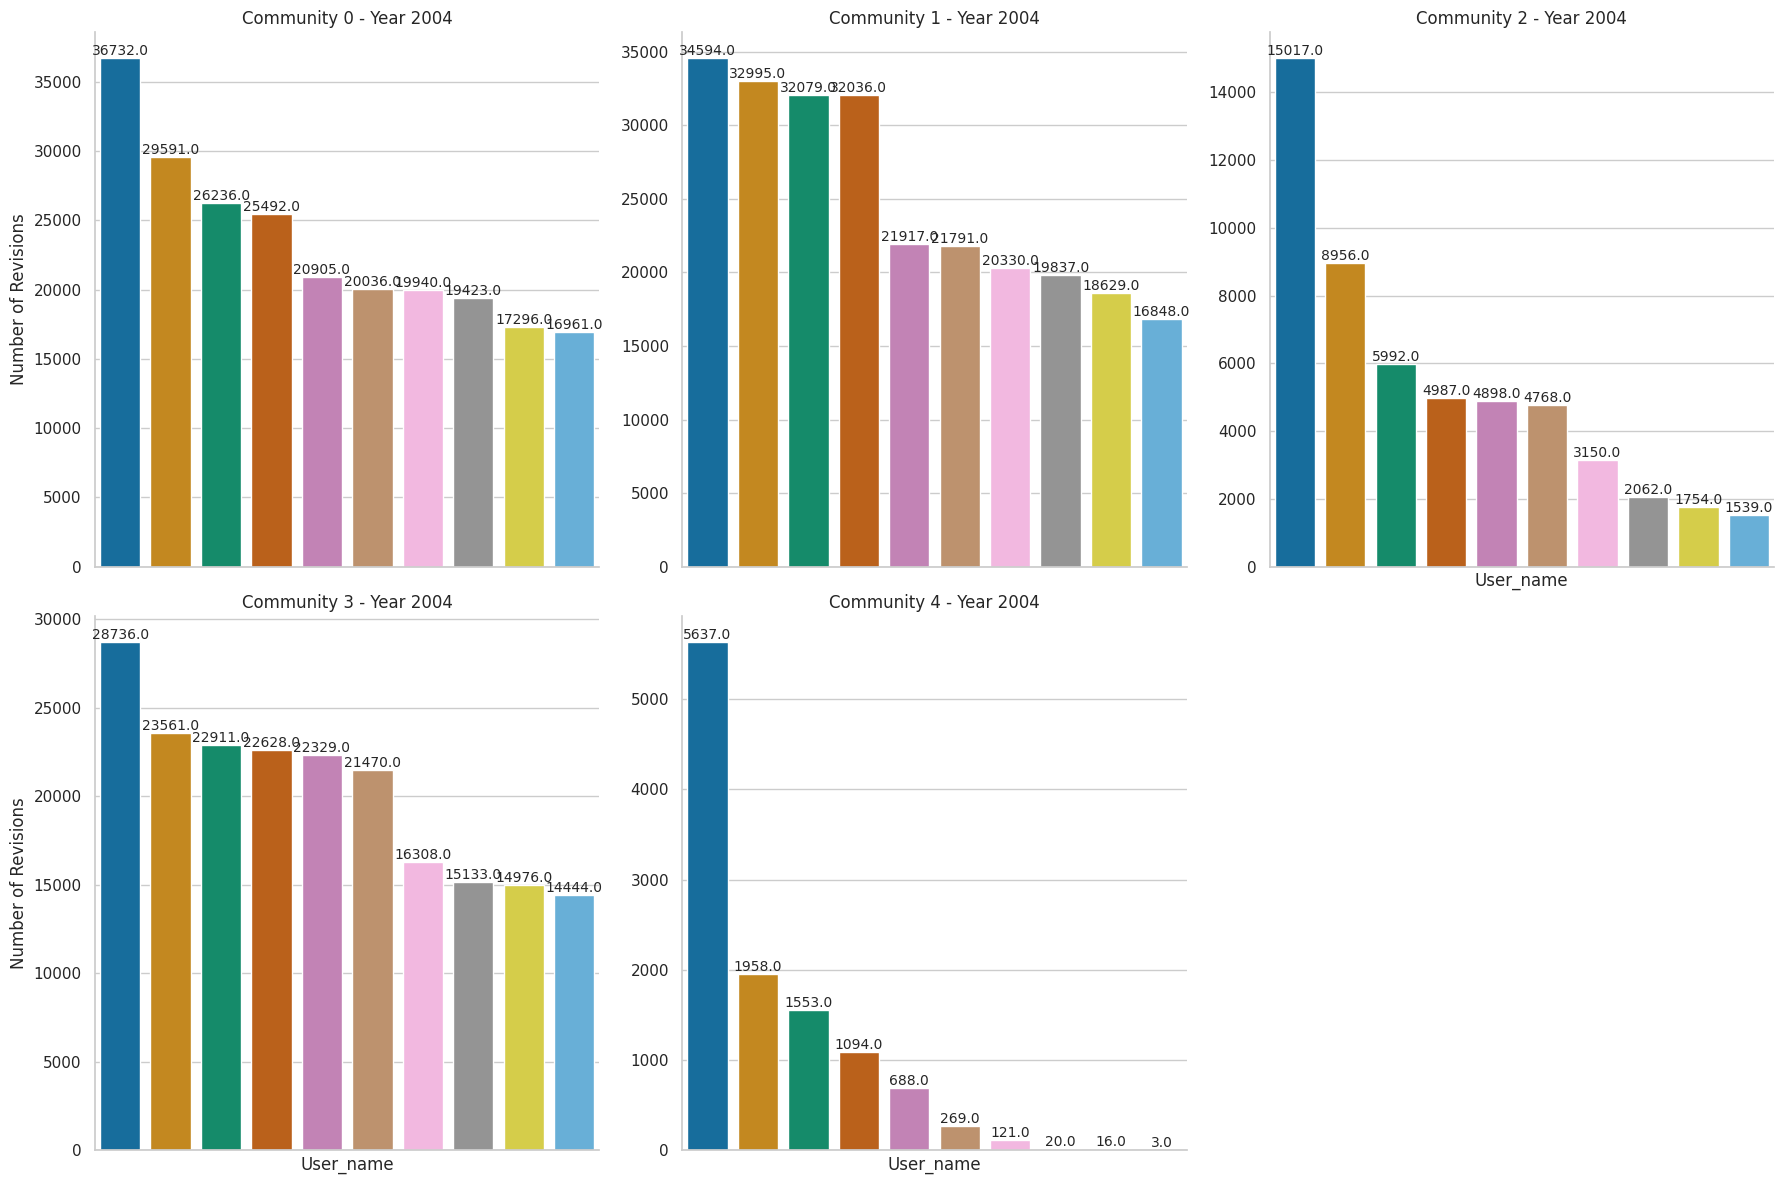

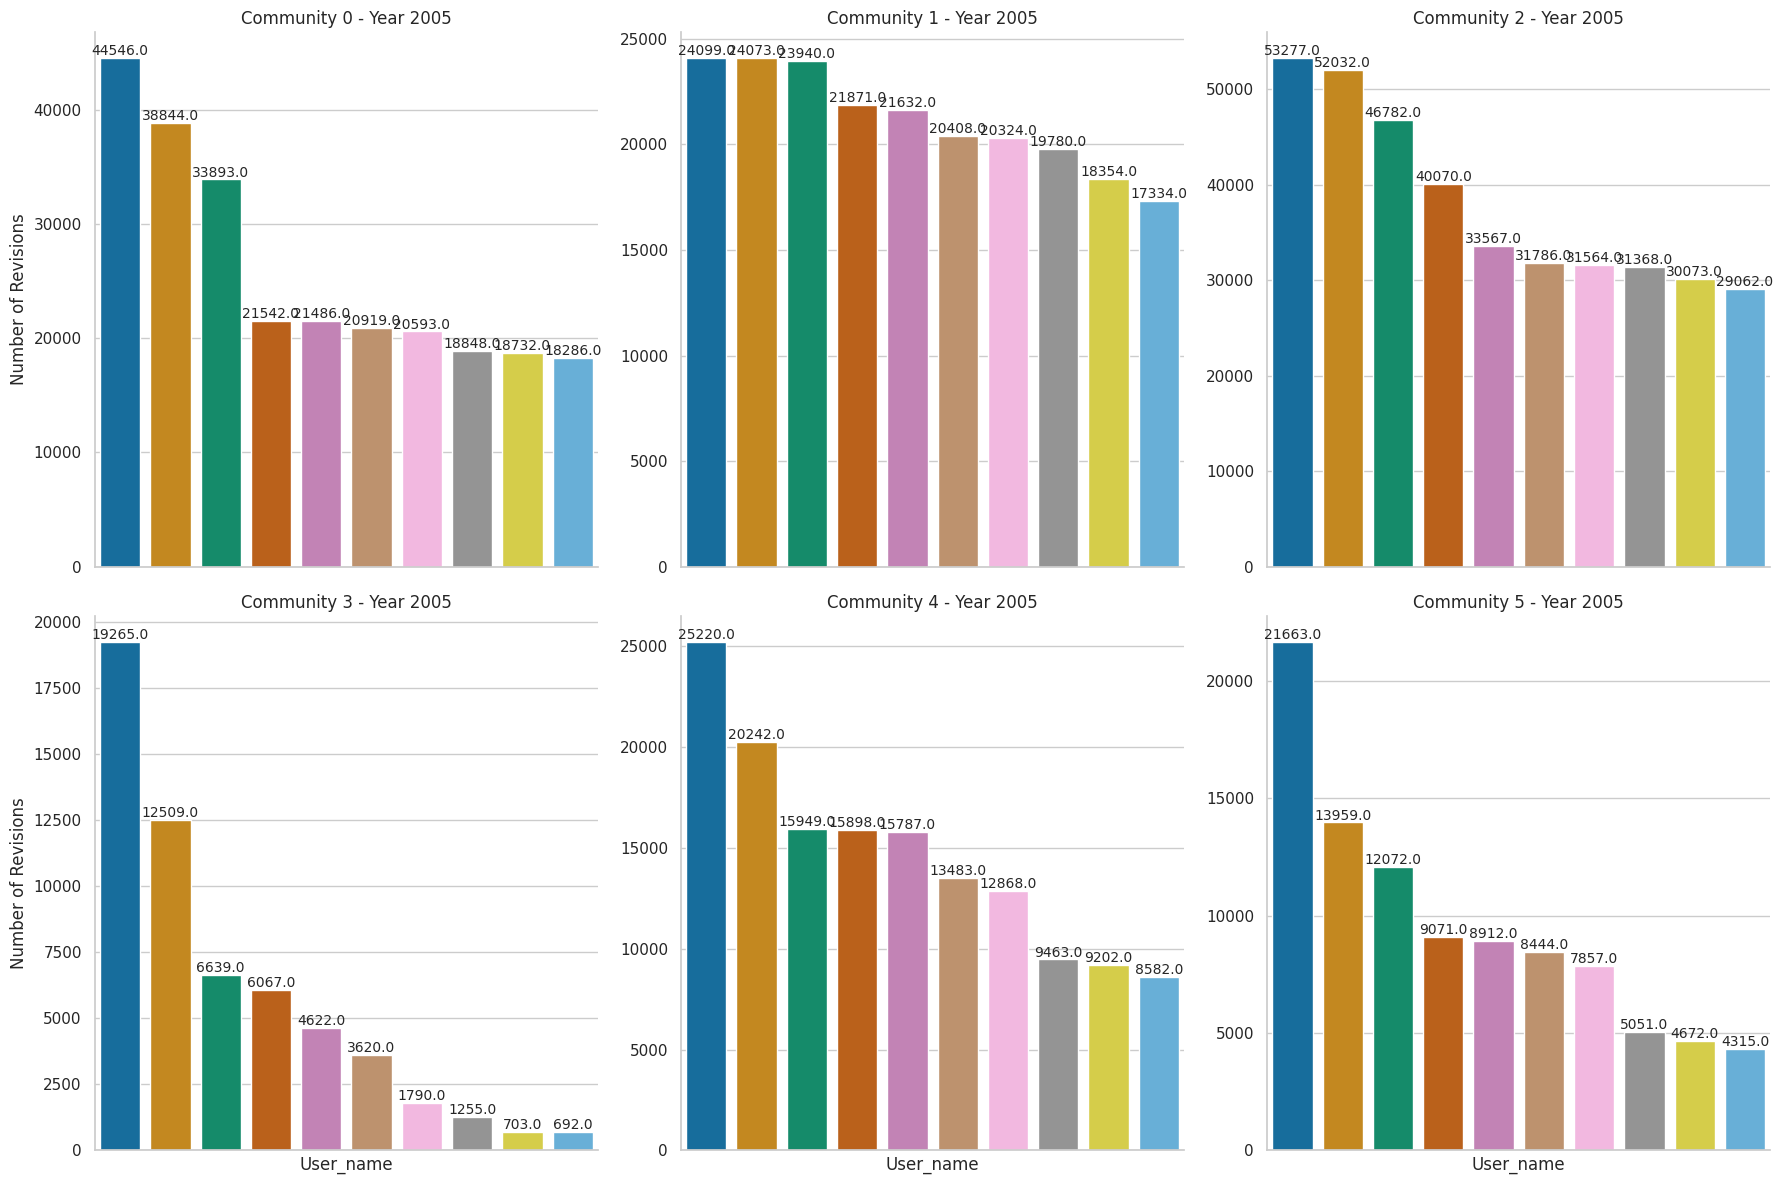

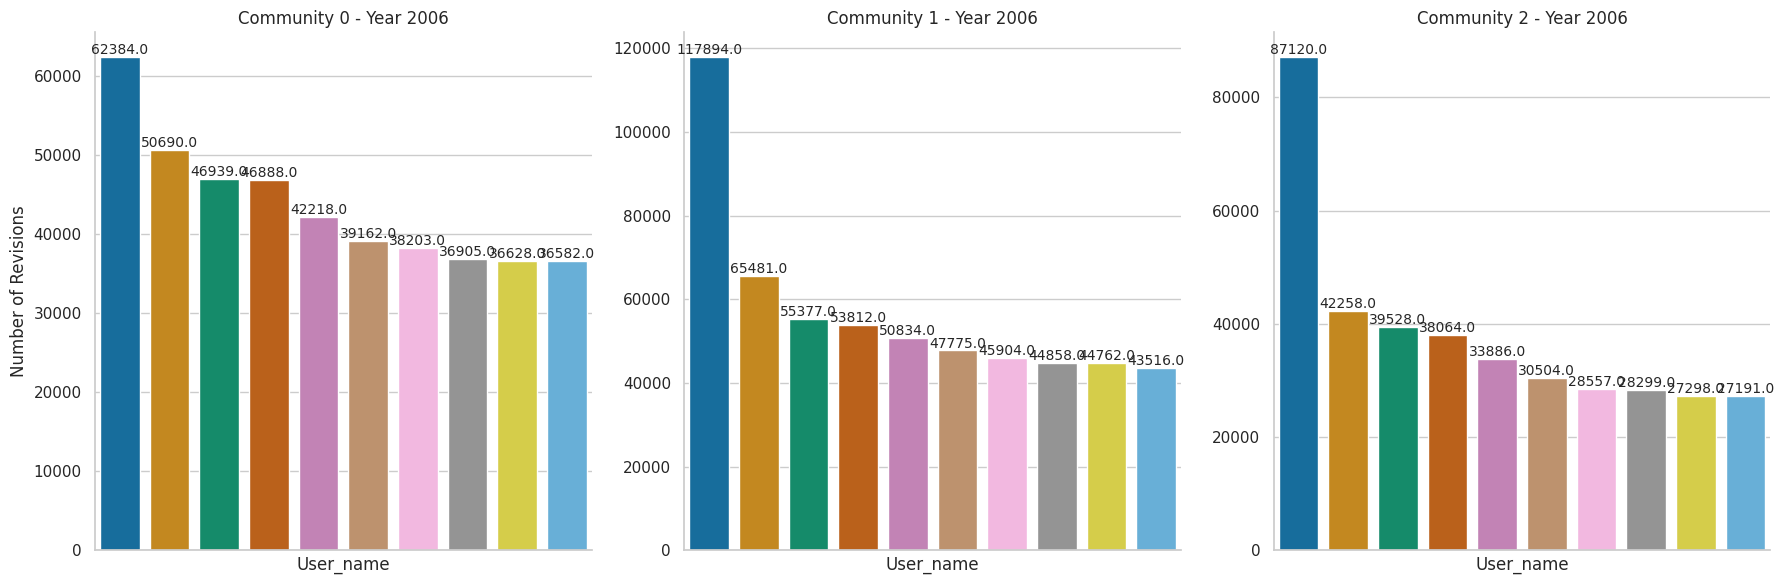

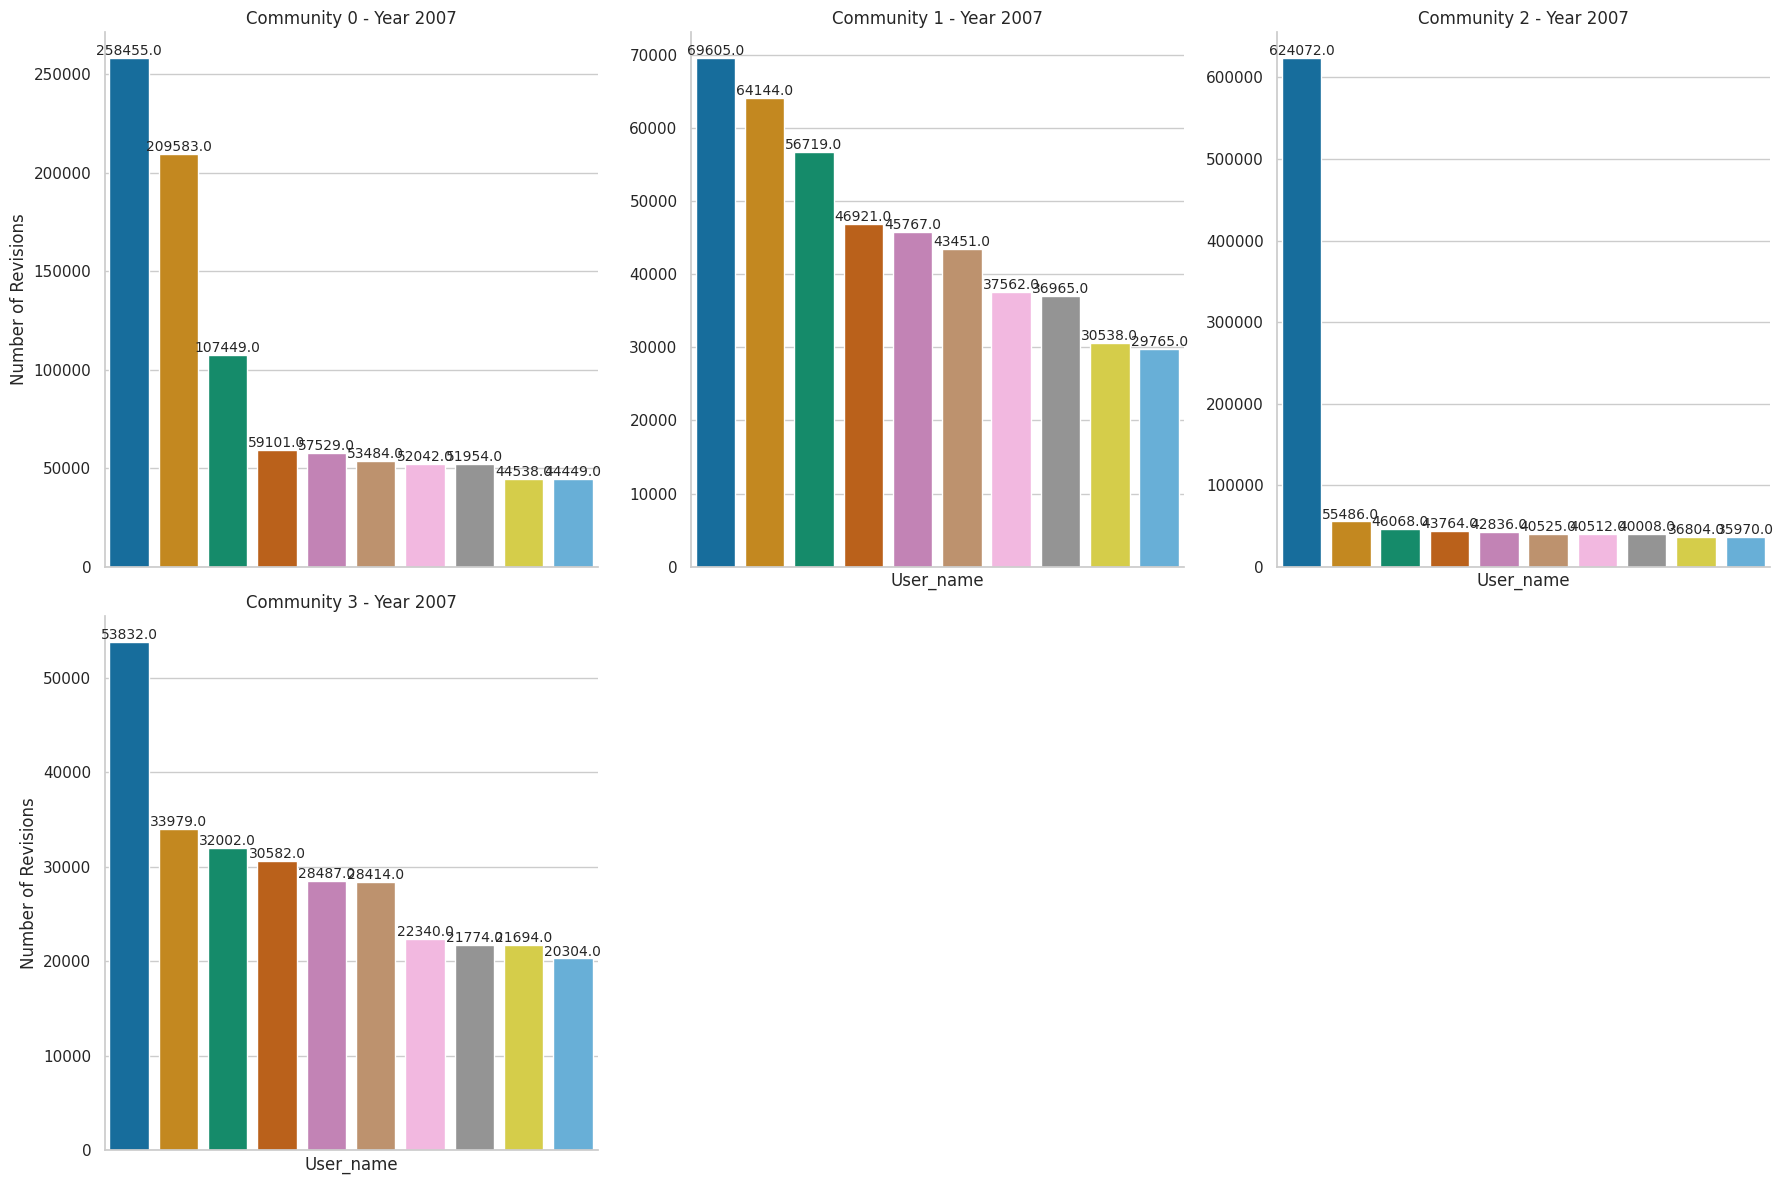

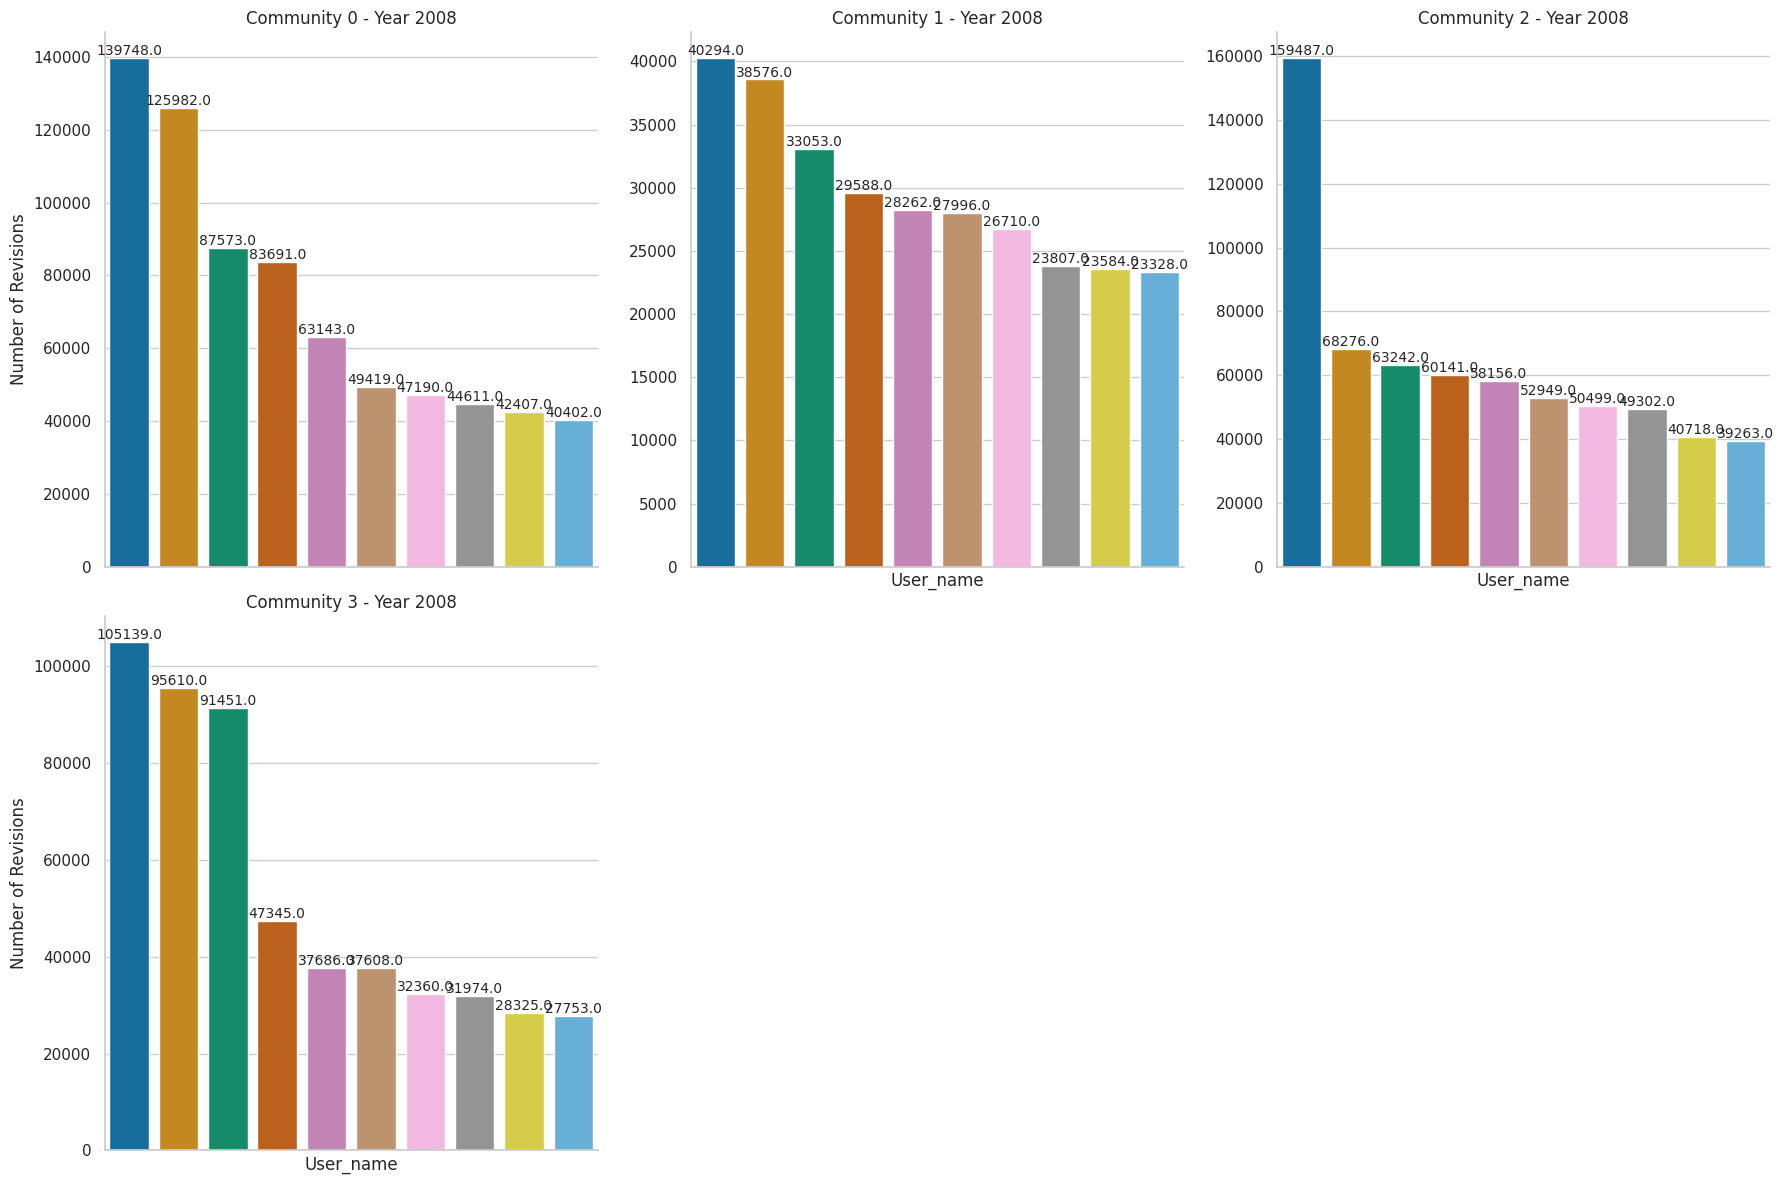

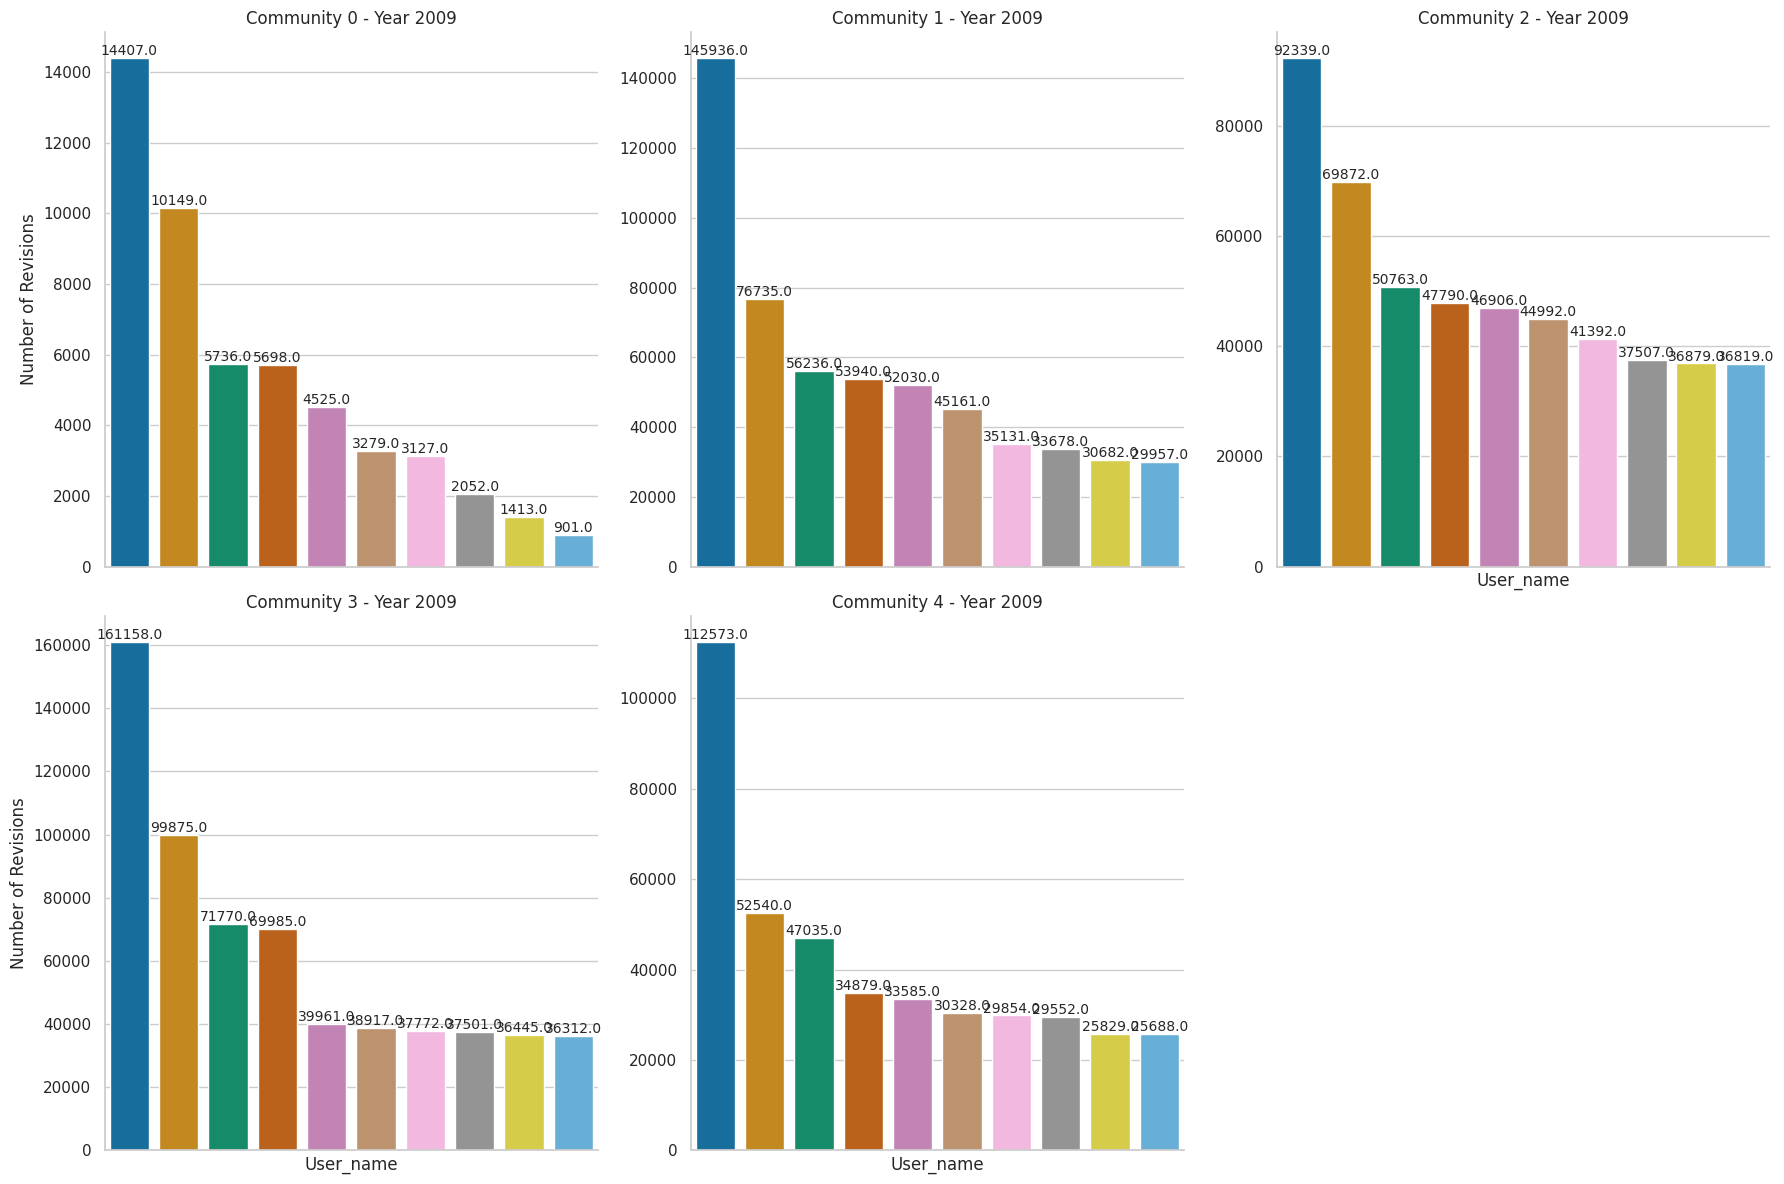

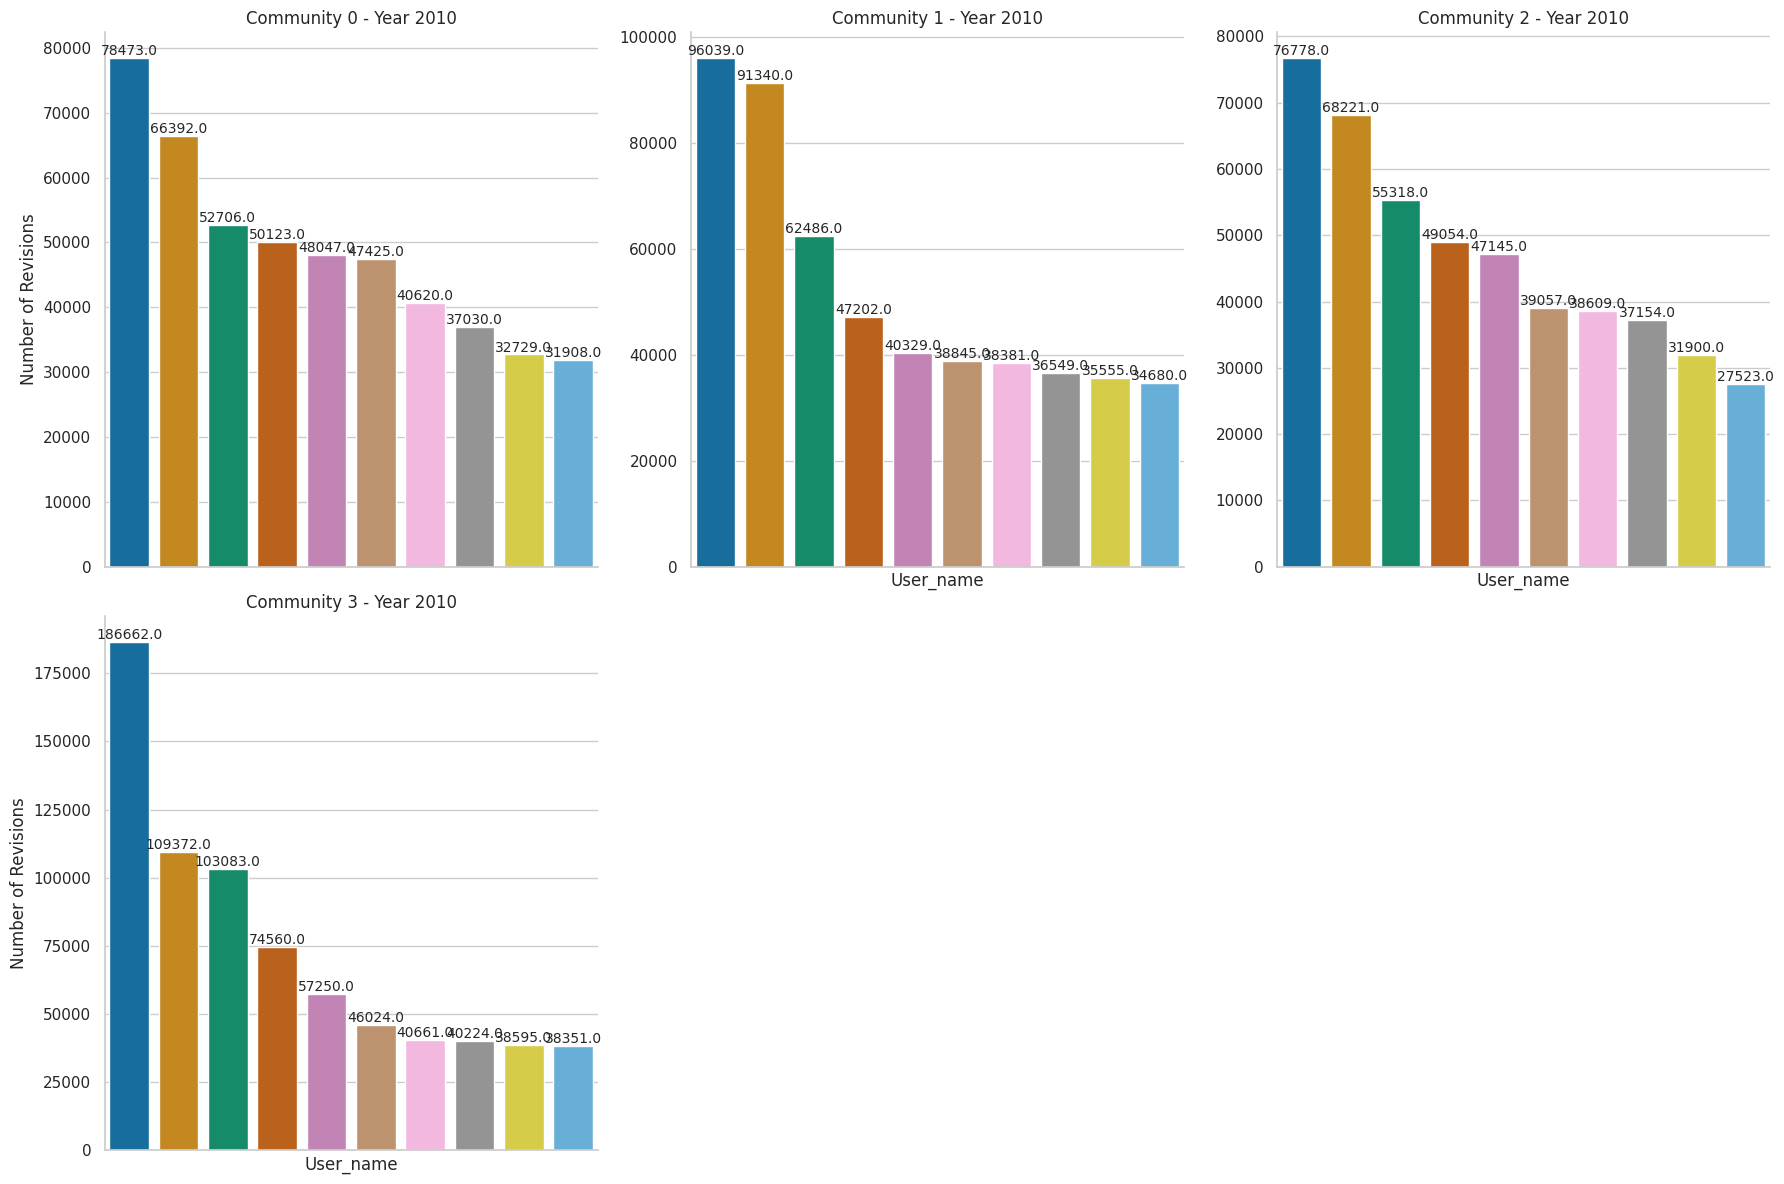

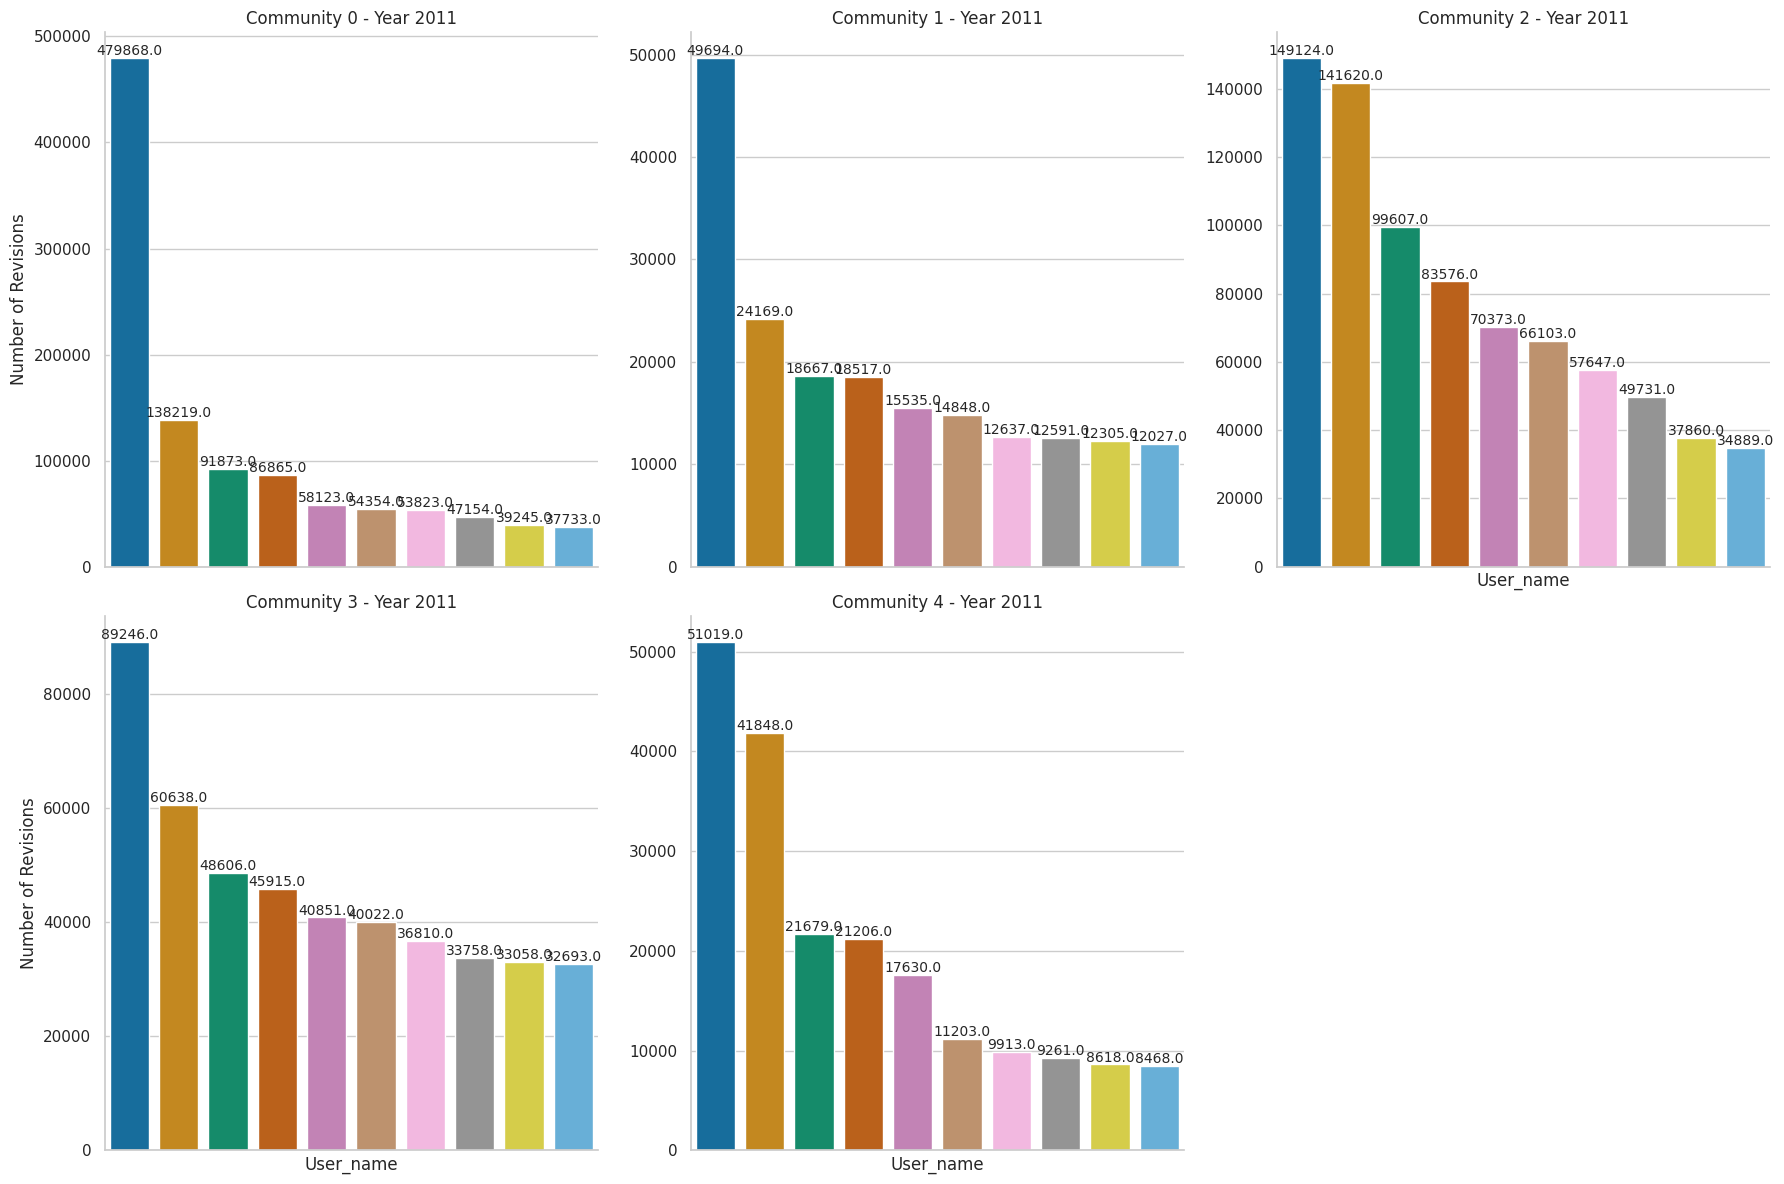

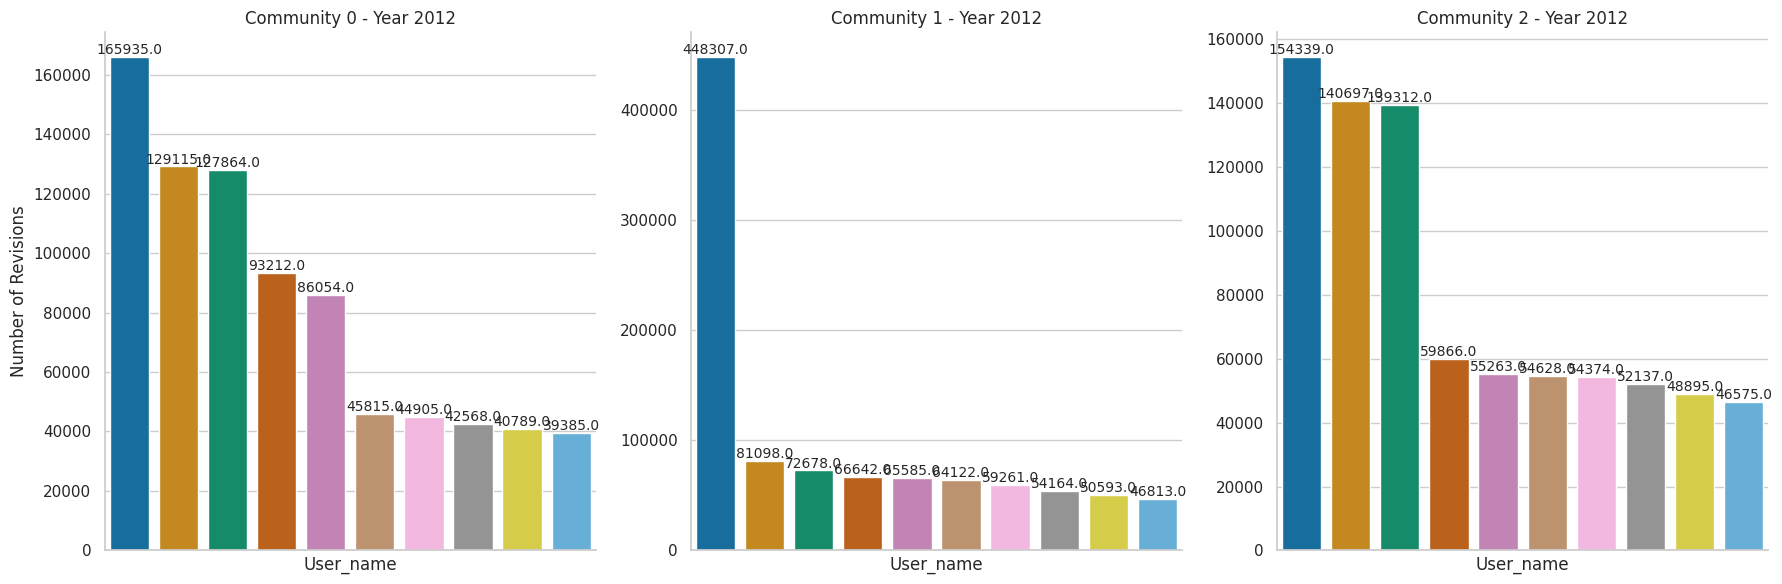

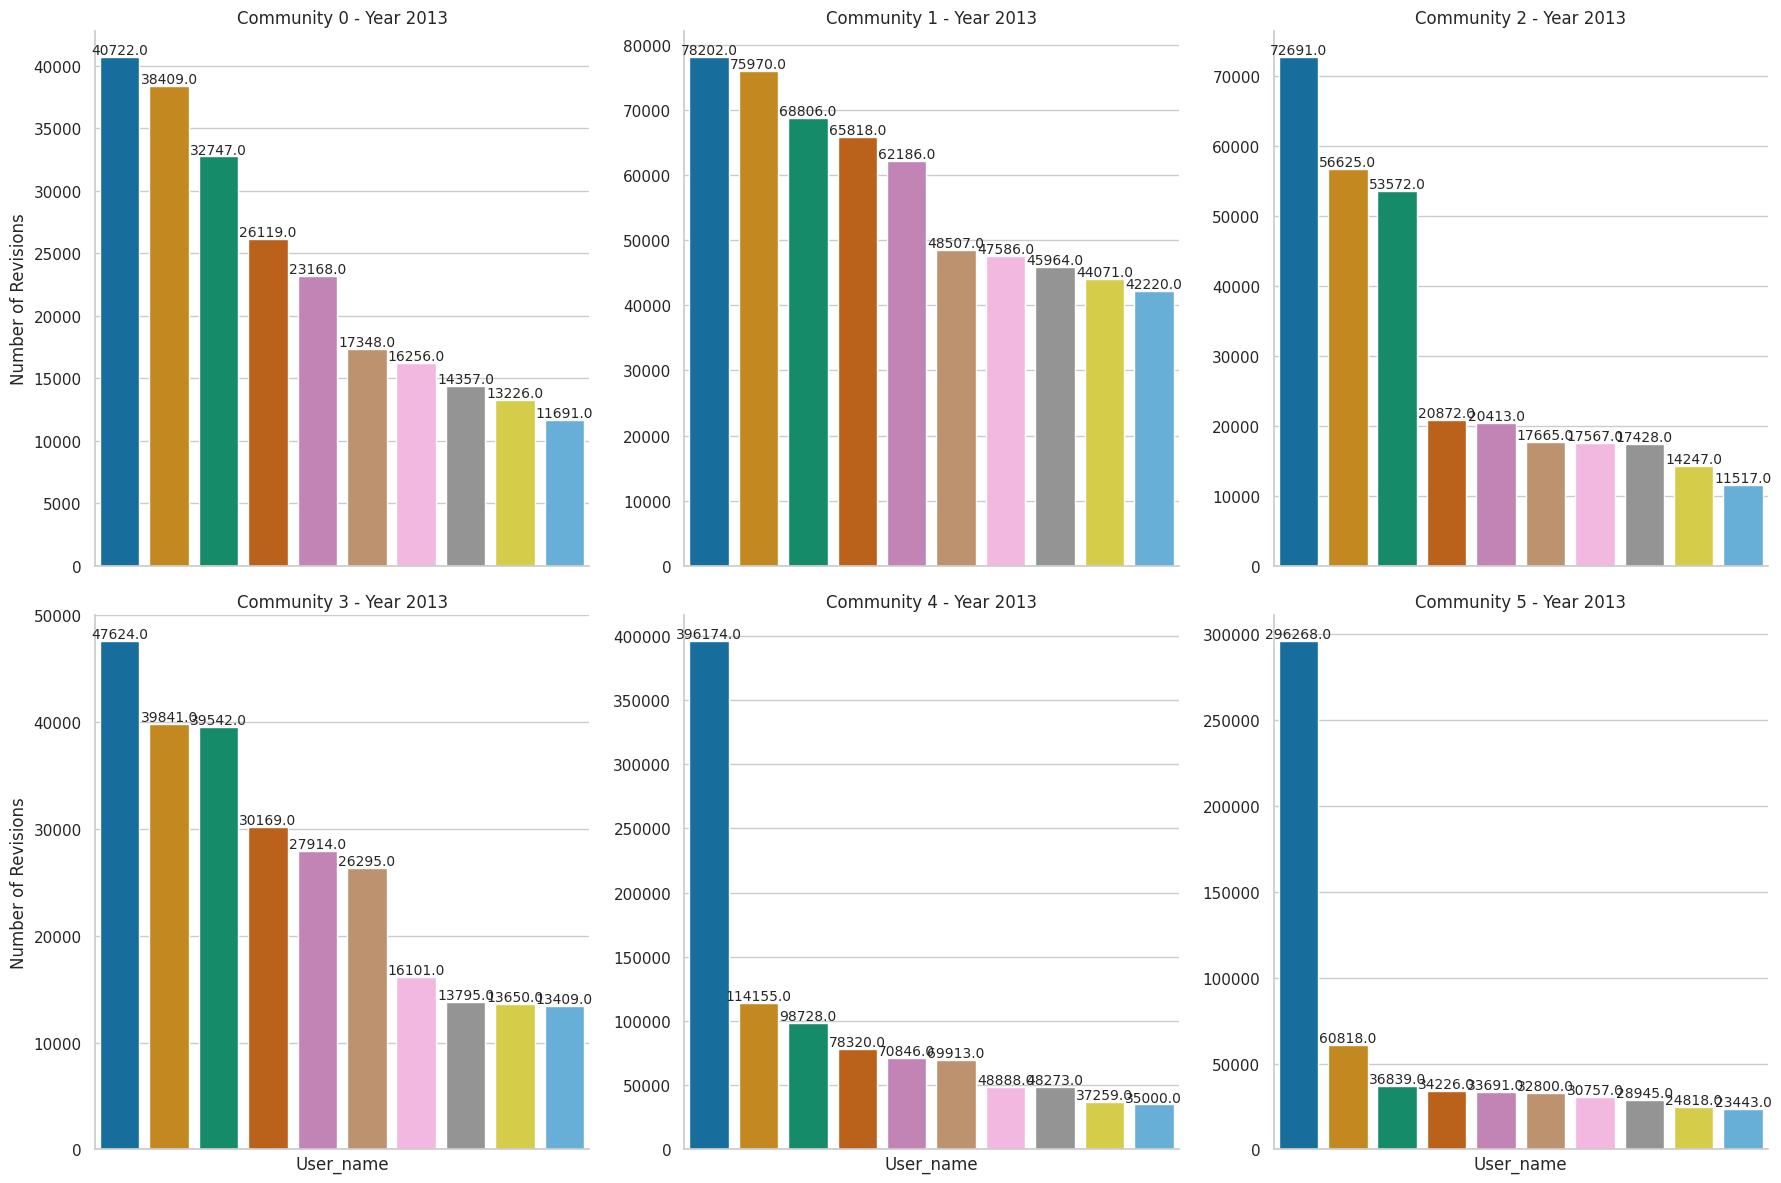

In [ ]:
# Plotting the top 10 user_name in terms of revisions for each community in subplots
sns.set(style="whitegrid")

# Iterate through the years in top_users_dict
for year, top_users_df in top_users_dict.items():
    # Create a 3x5 grid of subplots (adjust the layout based on your preference)
    g = sns.FacetGrid(top_users_df, col="Community", col_wrap=3, height=6, sharey=False, col_order=sorted(df_dict[year]['Community'].unique()))
    g.map(sns.barplot, 'Source', 'revisions', palette='colorblind')

    # Set titles and labels
    g.set_titles(f"Community {{col_name}} - Year {year}")
    g.set_axis_labels("User_name", "Number of Revisions")
    g.set(xticks=[])

    # Add labels for each bar
    def add_labels(*args, **kwargs):
        ax = plt.gca()
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', size = 10)

    # Modify the label text to user_name
    g.map(lambda *args, **kwargs: add_labels(*args, **kwargs, label='Source'))

    plt.show()

### Average voting time of the top 10 active source of each community

In [ ]:
stats = compute_stat(df_timeserie, top_users_dict)
stats

,Year,Community,Source,Voting_time,Vote_number,revisions
0,2004.0,0,Seth Ilys,56.54,10.00,36732.0
1,2004.0,0,Angela,20.07,6.00,29591.0
2,2004.0,0,Charles Matthews,33.95,9.40,25492.0
3,2004.0,0,Timwi,0.00,1.00,20905.0
4,2004.0,0,Maximus Rex,33.84,6.68,20036.0
...,...,...,...,...,...,...
430,2013.0,5,Sitush,97.24,97.50,32800.0
431,2013.0,5,Titodutta,64.34,76.17,30757.0
432,2013.0,5,Crisco 1492,33.76,72.67,28945.0
433,2013.0,5,Andrewman327,31.18,45.00,24818.0
